## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from ydata_profiling import ProfileReport

### Read Data

In [2]:
data = pd.read_csv("/content/students_adaptability_level_online_education.csv")

In [3]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Generate Data Profiling Report

In [4]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding

Choose a suitable encoding technique for the columns.

In [5]:
one_hot_encoding = pd.get_dummies(data, columns=['Gender', 'Financial Condition', 'Device'], dtype='int')
one_hot_encoding.head()

data = one_hot_encoding

In [6]:
order_education = ['School', 'College', 'University']

ordinal_encoder_education = OrdinalEncoder(categories=[order_education])

data['Education_Ordinal_Encoded'] = ordinal_encoder_education.fit_transform(data[['Education Level']])

data[['Education Level', 'Education_Ordinal_Encoded']].head()

,Education Level,Education_Ordinal_Encoded
0,University,2.0
1,University,2.0
2,College,1.0
3,School,0.0
4,School,0.0


In [7]:
order_age = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']

ordinal_encoder_age = OrdinalEncoder(categories=[order_age])

data['Age_Ordinal_Encoded'] = ordinal_encoder_age.fit_transform(data[['Age']])

data[['Age', 'Age_Ordinal_Encoded']].head()

,Age,Age_Ordinal_Encoded
0,21-25,4.0
1,21-25,4.0
2,16-20,3.0
3,11-15,2.0
4,16-20,3.0


In [8]:
order_class_duration = ['0', '1-3', '3-6']

ordinal_encoder_class_duration = OrdinalEncoder(categories=[order_class_duration])

data['Class_Duration_Ordinal_Encoded'] = ordinal_encoder_class_duration.fit_transform(data[['Class Duration']])

data[['Class Duration', 'Class_Duration_Ordinal_Encoded']].head()

,Class Duration,Class_Duration_Ordinal_Encoded
0,3-6,2.0
1,1-3,1.0
2,1-3,1.0
3,1-3,1.0
4,0,0.0


In [9]:
order_network_type = ['2G', '3G', '4G']

ordinal_encoder_network_type = OrdinalEncoder(categories=[order_network_type])

data['Network_Type_Ordinal_Encoded'] = ordinal_encoder_network_type.fit_transform(data[['Network Type']])

data[['Network Type', 'Network_Type_Ordinal_Encoded']].head()

,Network Type,Network_Type_Ordinal_Encoded
0,4G,2.0
1,4G,2.0
2,4G,2.0
3,4G,2.0
4,3G,1.0


In [10]:
order_adaptivity_level = ['Low', 'Moderate', 'High']

ordinal_encoder_adaptivity_level = OrdinalEncoder(categories=[order_adaptivity_level])

data['Adaptivity_Level_Ordinal_Encoded'] = ordinal_encoder_adaptivity_level.fit_transform(data[['Adaptivity Level']])

data[['Adaptivity Level', 'Adaptivity_Level_Ordinal_Encoded']].head()

,Adaptivity Level,Adaptivity_Level_Ordinal_Encoded
0,Moderate,1.0
1,Moderate,1.0
2,Moderate,1.0
3,Moderate,1.0
4,Low,0.0


In [11]:
columns_to_encode = ['IT Student', 'Location', 'Load-shedding', 'Self Lms', 'Internet Type', 'Institution Type']

# Creating a BinaryEncoder object
encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Applying binary encoding to the specified columns
data_binary_encoded = encoder.fit_transform(data)

data = data_binary_encoded

In [12]:
# Select object columns
object_columns = data.select_dtypes(include=['object']).columns

# Drop object columns from the DataFrame
data_numeric = data.drop(columns=object_columns)


data_numeric.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Institution Type_0                1205 non-null   int64  
 1   Institution Type_1                1205 non-null   int64  
 2   IT Student_0                      1205 non-null   int64  
 3   IT Student_1                      1205 non-null   int64  
 4   Location_0                        1205 non-null   int64  
 5   Location_1                        1205 non-null   int64  
 6   Load-shedding_0                   1205 non-null   int64  
 7   Load-shedding_1                   1205 non-null   int64  
 8   Internet Type_0                   1205 non-null   int64  
 9   Internet Type_1                   1205 non-null   int64  
 10  Self Lms_0                        1205 non-null   int64  
 11  Self Lms_1                        1205 non-null   int64  
 12  Gender

### Check distribution

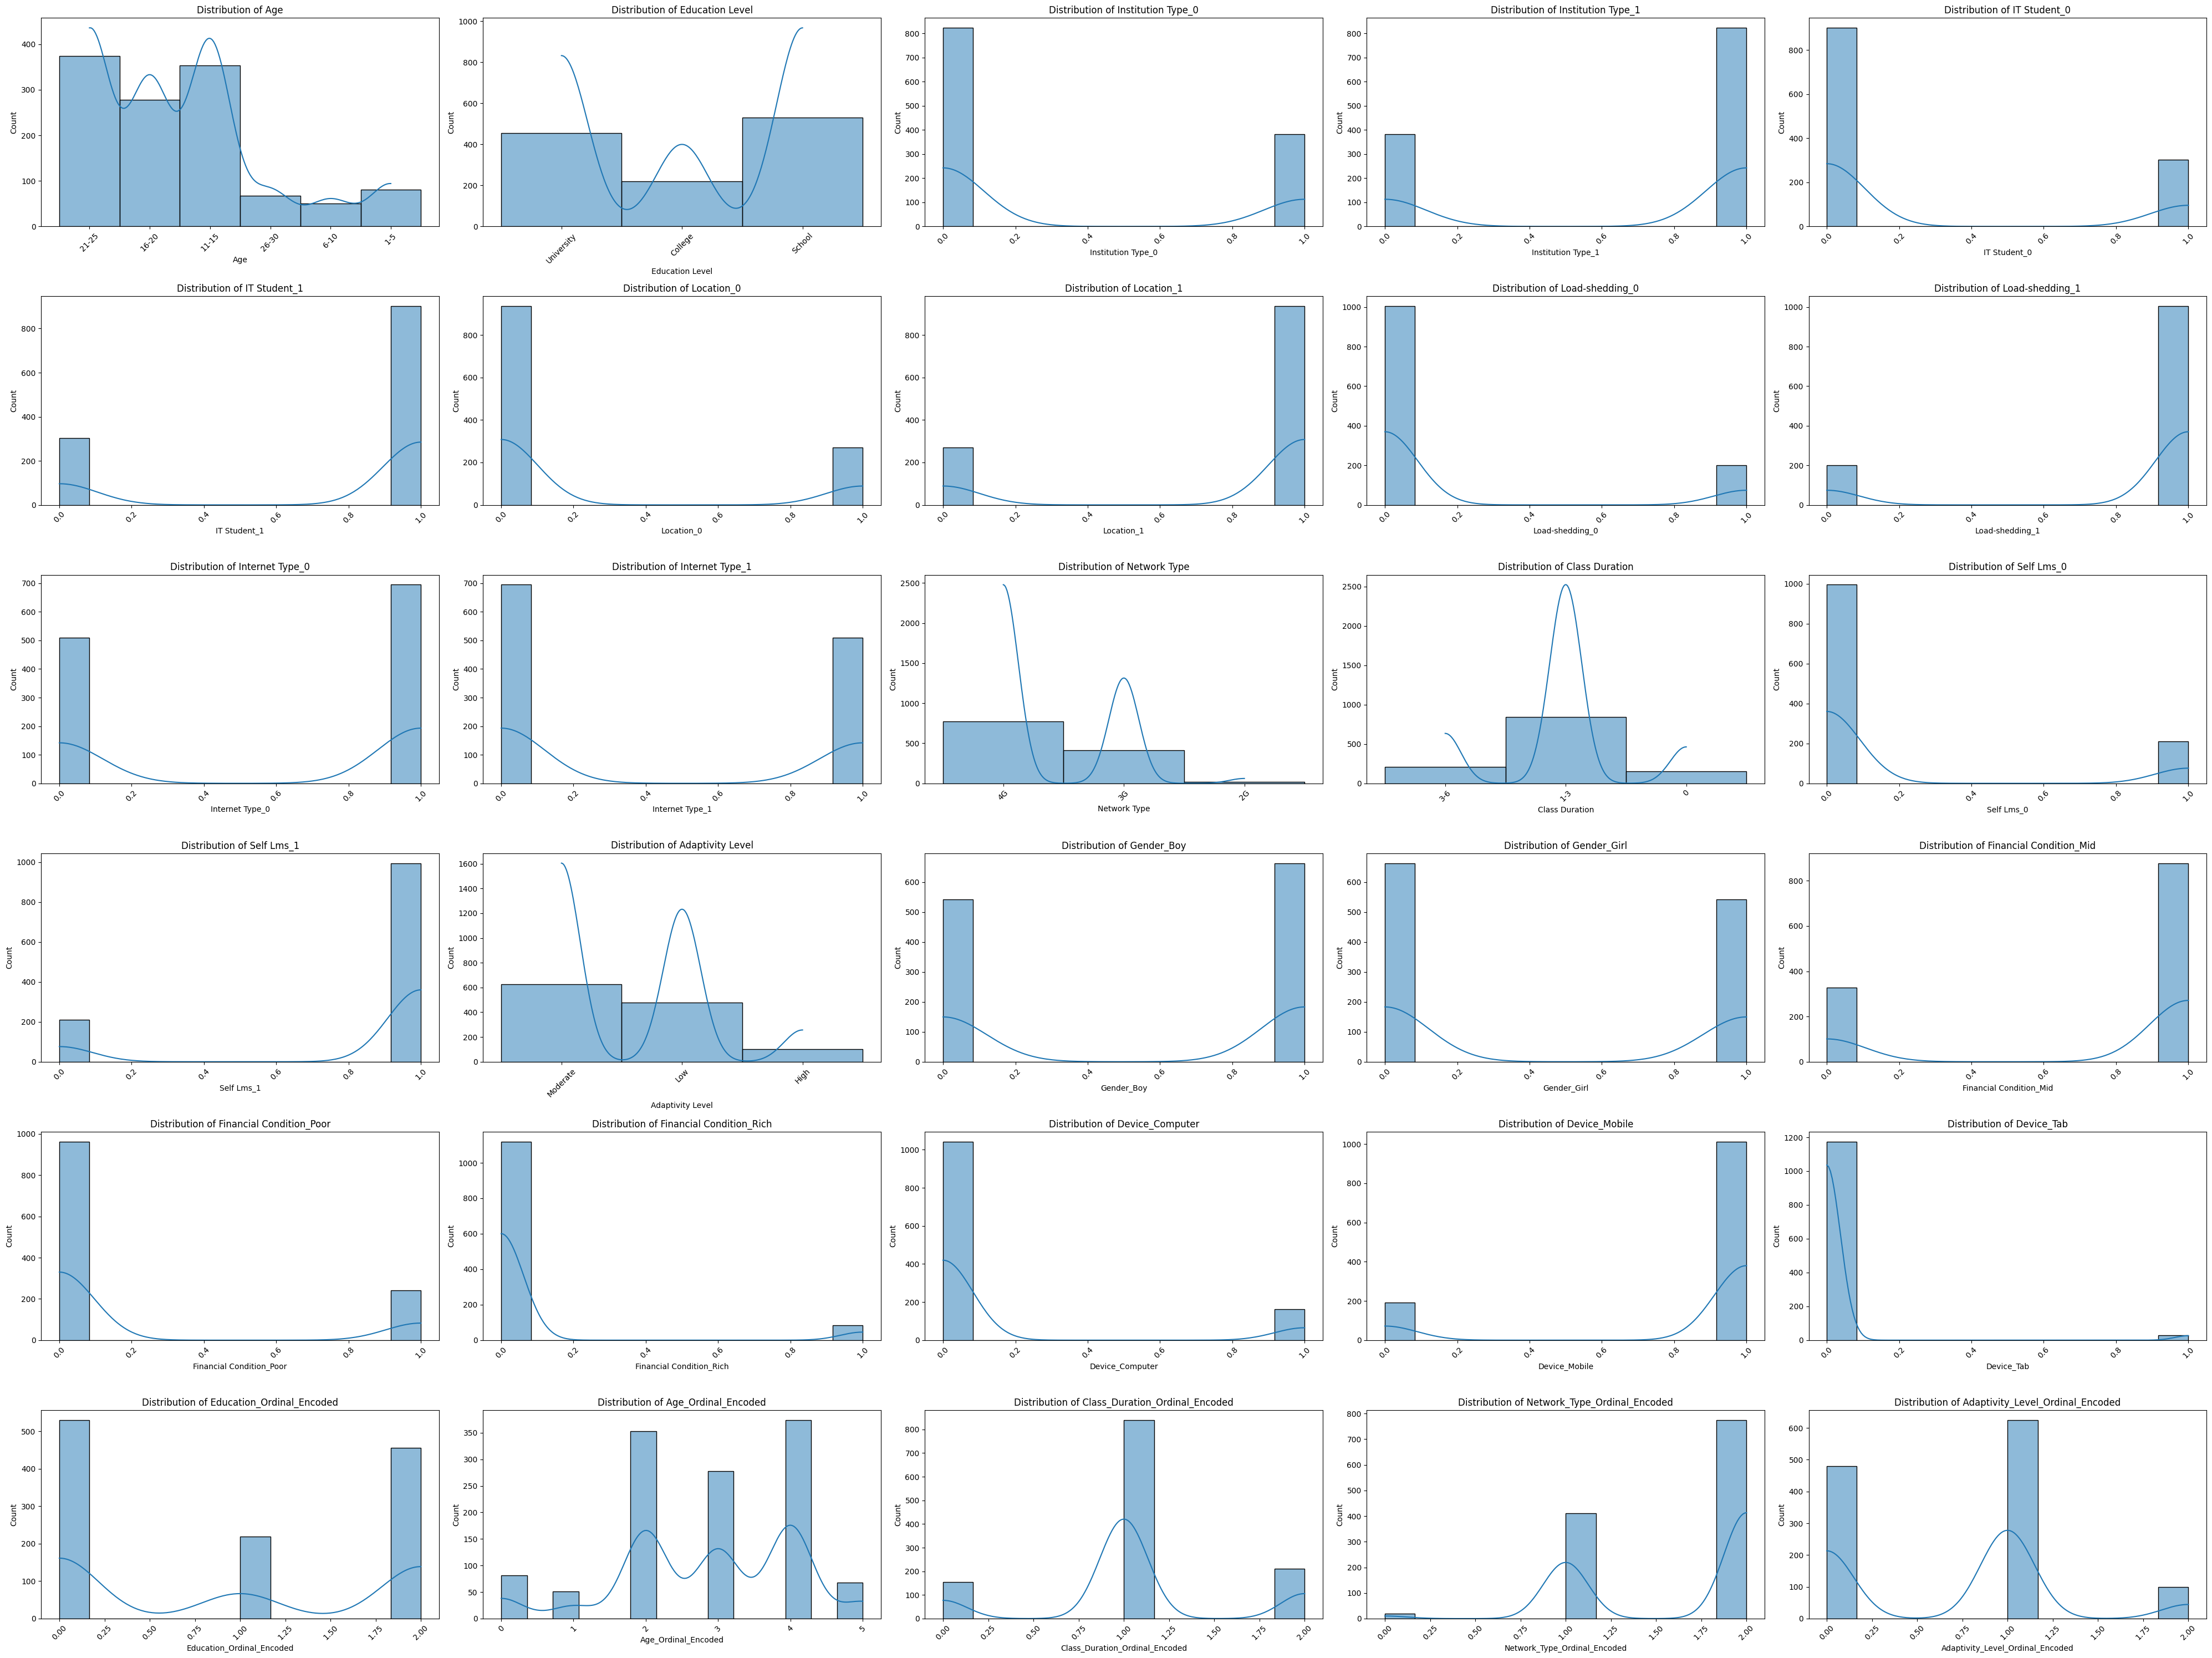

In [13]:
plt.figure(figsize=(40, 30))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [17]:
X = data_numeric.iloc[:, :-1]  # Features
Y = data_numeric['Adaptivity_Level_Ordinal_Encoded']  # Target variable


### Feature Scaling

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [21]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# KNN

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN model:", accuracy_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Classification Report for KNN model:")
print(report_knn)

Accuracy of KNN model: 0.7759336099585062
Classification Report for KNN model:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       103
         1.0       0.74      0.83      0.79       115
         2.0       0.80      0.52      0.63        23

    accuracy                           0.78       241
   macro avg       0.79      0.71      0.74       241
weighted avg       0.78      0.78      0.77       241



#### Check different distance metric

**Euclidean**

In [23]:
# Initialize the KNN classifier with Euclidean distance metric
knn_model_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the KNN model on the training data
knn_model_euclidean.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn_euclidean = knn_model_euclidean.predict(X_test)

# Calculate the accuracy
accuracy_knn_euclidean = accuracy_score(y_test, y_pred_knn_euclidean)
print("Accuracy of KNN model with Euclidean distance:", accuracy_knn_euclidean)

# Generate classification report
report_knn_euclidean = classification_report(y_test, y_pred_knn_euclidean)
print("Classification Report for KNN model with Euclidean distance:")
print(report_knn_euclidean)

Accuracy of KNN model with Euclidean distance: 0.7759336099585062
Classification Report for KNN model with Euclidean distance:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       103
         1.0       0.74      0.83      0.79       115
         2.0       0.80      0.52      0.63        23

    accuracy                           0.78       241
   macro avg       0.79      0.71      0.74       241
weighted avg       0.78      0.78      0.77       241



**Manhattan**

In [24]:
# Initialize the KNN classifier with Manhattan distance metric
knn_model_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the KNN model on the training data
knn_model_manhattan.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn_manhattan = knn_model_manhattan.predict(X_test)

# Calculate the accuracy
accuracy_knn_manhattan = accuracy_score(y_test, y_pred_knn_manhattan)
print("Accuracy of KNN model with Manhattan distance:", accuracy_knn_manhattan)

# Generate classification report
report_knn_manhattan = classification_report(y_test, y_pred_knn_manhattan)
print("Classification Report for KNN model with Manhattan distance:")
print(report_knn_manhattan)


Accuracy of KNN model with Manhattan distance: 0.7800829875518672
Classification Report for KNN model with Manhattan distance:
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       103
         1.0       0.74      0.83      0.79       115
         2.0       0.86      0.52      0.65        23

    accuracy                           0.78       241
   macro avg       0.81      0.71      0.74       241
weighted avg       0.79      0.78      0.78       241



# Decision Tree

**Using Entropy**

In [25]:
# Initialize the Decision Tree classifier with entropy criterion
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree model on the training data
dt_model_entropy.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt_entropy = dt_model_entropy.predict(X_test)

# Calculate the accuracy
accuracy_dt_entropy = accuracy_score(y_test, y_pred_dt_entropy)
print("Accuracy of Decision Tree model with entropy criterion:", accuracy_dt_entropy)

# Generate classification report
report_dt_entropy = classification_report(y_test, y_pred_dt_entropy)
print("Classification Report for Decision Tree model with entropy criterion:")
print(report_dt_entropy)


Accuracy of Decision Tree model with entropy criterion: 0.8713692946058091
Classification Report for Decision Tree model with entropy criterion:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       103
         1.0       0.86      0.89      0.88       115
         2.0       0.68      0.65      0.67        23

    accuracy                           0.87       241
   macro avg       0.82      0.81      0.82       241
weighted avg       0.87      0.87      0.87       241



**Use Gini Index**

In [26]:
# Initialize the Decision Tree classifier with Gini index criterion
dt_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the Decision Tree model on the training data
dt_model_gini.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt_gini = dt_model_gini.predict(X_test)

# Calculate the accuracy
accuracy_dt_gini = accuracy_score(y_test, y_pred_dt_gini)
print("Accuracy of Decision Tree model with Gini index criterion:", accuracy_dt_gini)

# Generate classification report
report_dt_gini = classification_report(y_test, y_pred_dt_gini)
print("Classification Report for Decision Tree model with Gini index criterion:")
print(report_dt_gini)


Accuracy of Decision Tree model with Gini index criterion: 0.8838174273858921
Classification Report for Decision Tree model with Gini index criterion:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       103
         1.0       0.90      0.90      0.90       115
         2.0       0.83      0.65      0.73        23

    accuracy                           0.88       241
   macro avg       0.87      0.82      0.84       241
weighted avg       0.88      0.88      0.88       241



# All the Best!